In [1]:
%cd ..
from common.helpers import Helpers
%cd ./Task1

c:\Users\isaac\repos\MSDA\d208
c:\Users\isaac\repos\MSDA\d208\Task1


c:\Users\isaac\AppData\Local\pypoetry\Cache\virtualenvs\d208-3DHpwvHo-py3.11\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.max_columns', None)

df = pd.read_csv('../Data/churn_clean.csv')

### Columns remaining after cleaning:

'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Divorced', 'Married', 'Never Married', 'Separated', 'Widowed', 'Female', 'Male',
'Nonbinary', 'Rural', 'Suburban', 'Urban', 'DSL', 'Fiber Optic

In [3]:
target_for_analysis = 'Tenure'

In [4]:
df[[target_for_analysis]].describe()

,Tenure
count,10000.000000
mean,34.526188
std,26.443063
min,1.000259
25%,7.917694
50%,35.430507
75%,61.479795
max,71.999280


In [5]:
df[['Population','Children','Age','Income','Churn','Outage_sec_perweek' ,'Email','Contacts','Yearly_equip_failure','Techie','Contract']].describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000


In [6]:
df[['Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Tenure']].describe()

,Tenure
count,10000.000000
mean,34.526188
std,26.443063
min,1.000259
25%,7.917694
50%,35.430507
75%,61.479795
max,71.999280


In [7]:
df[['MonthlyCharge','Bandwidth_GB_Year','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']].describe()

,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


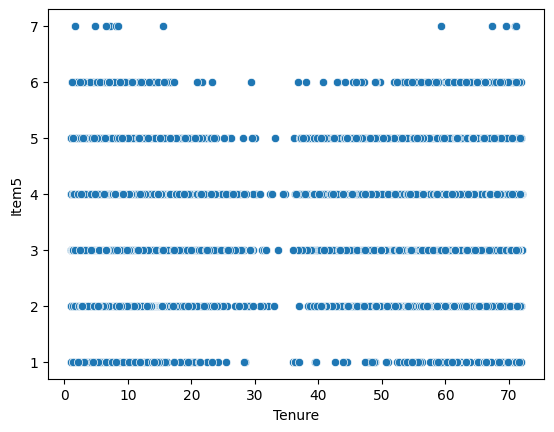

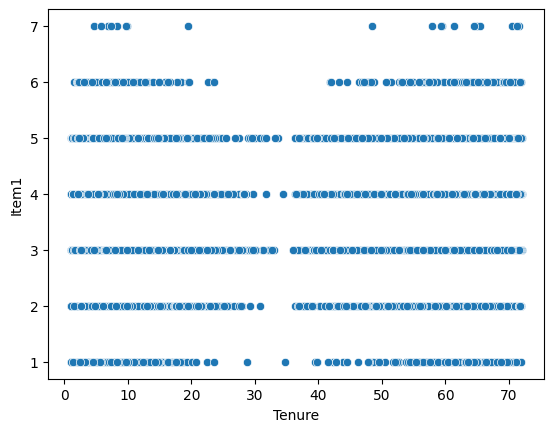

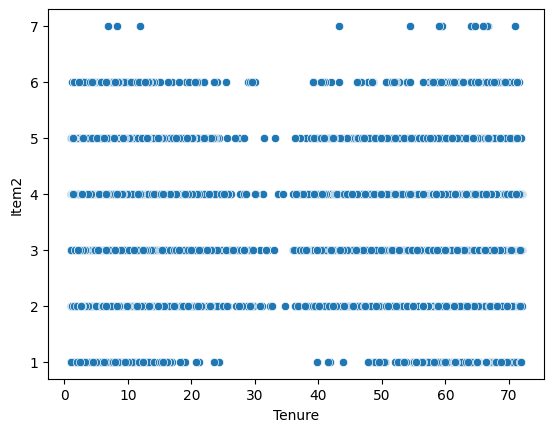

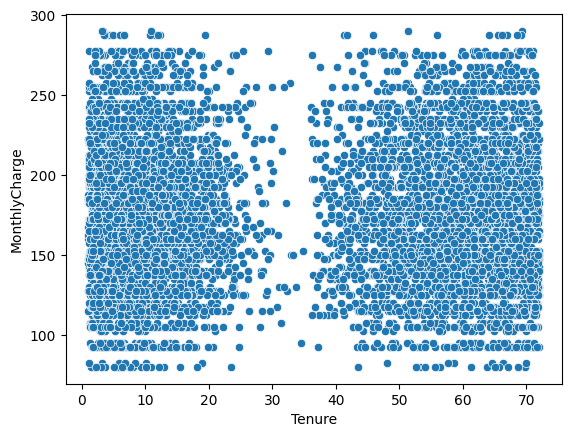

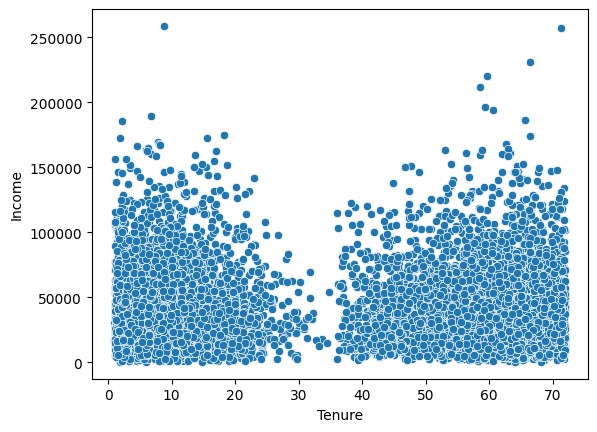

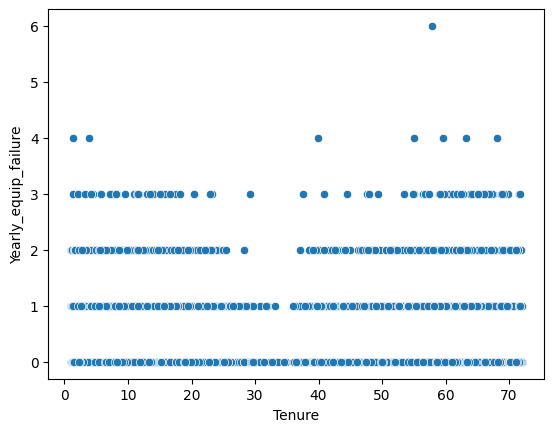

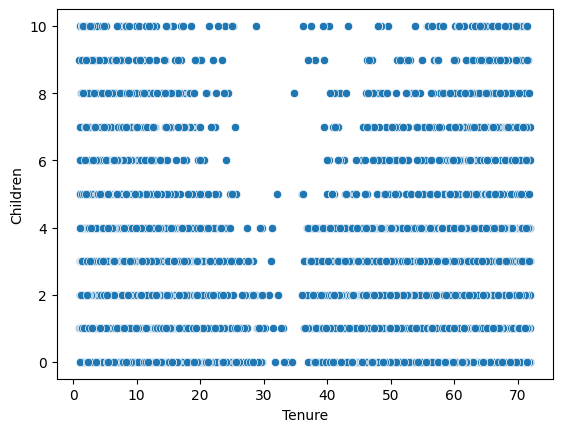

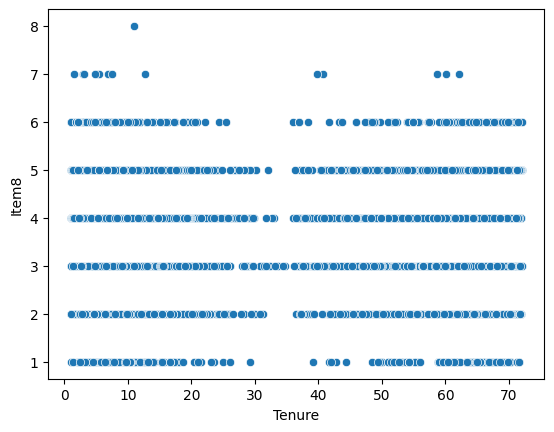

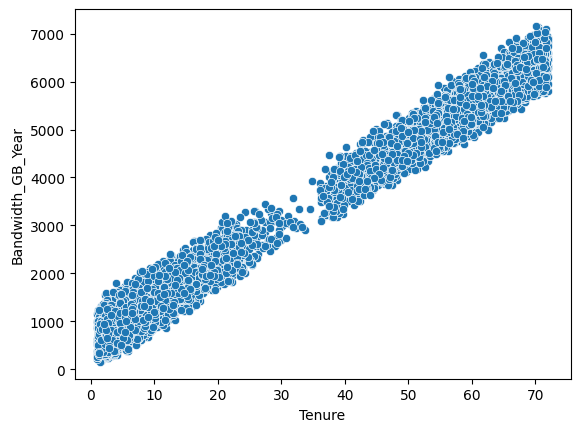

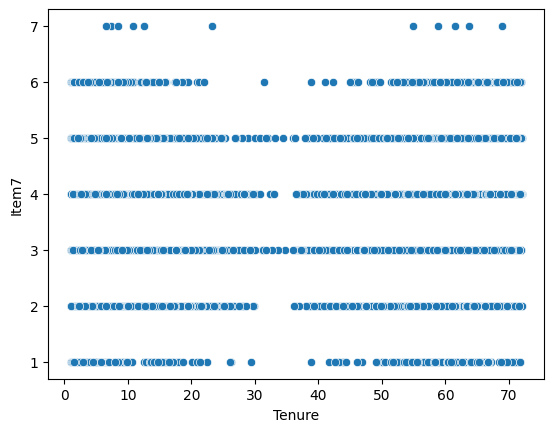

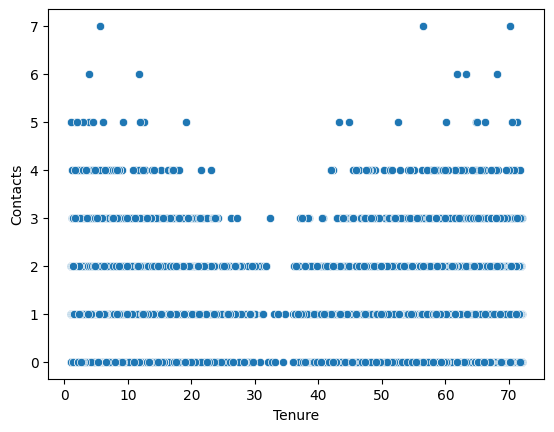

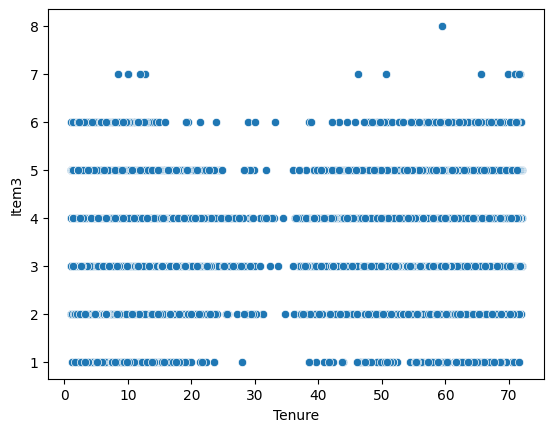

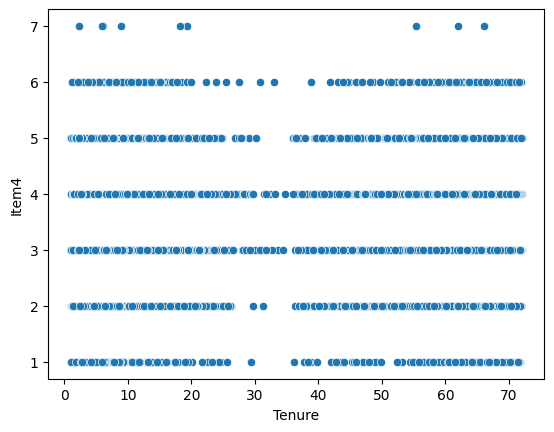

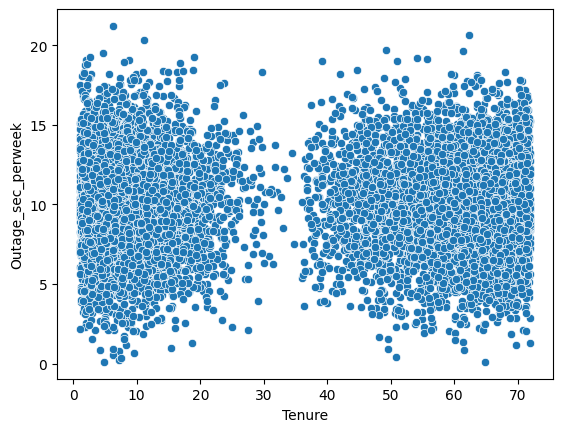

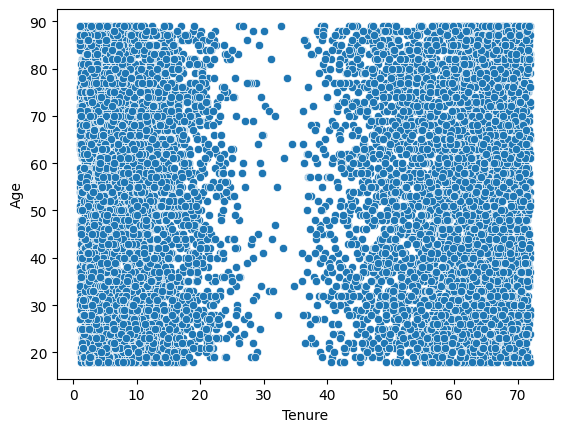

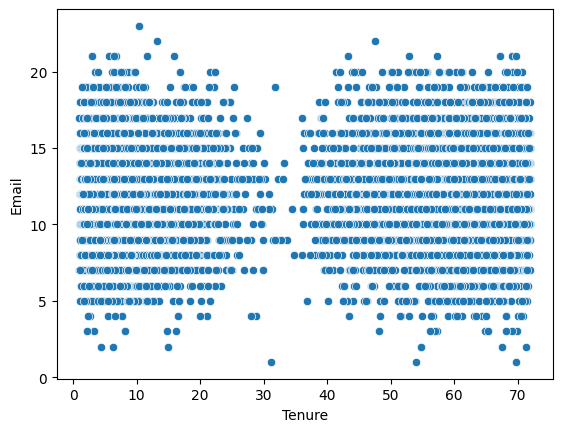

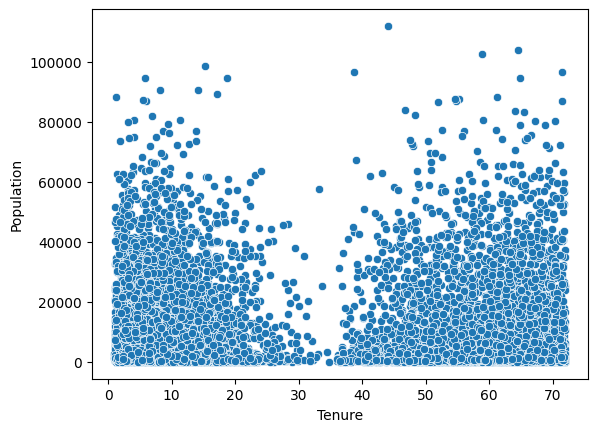

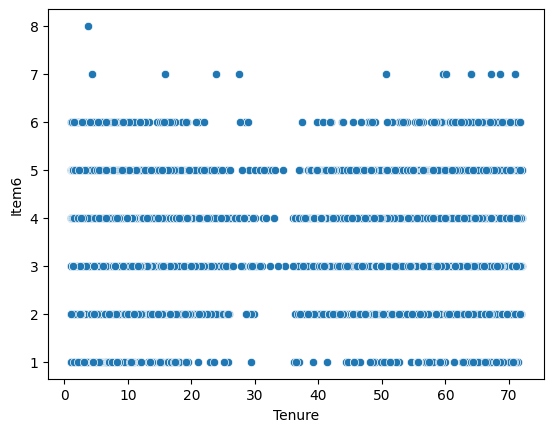

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = {'Population','Children','Age','Income','Churn','Outage_sec_perweek' ,'Email','Contacts','Yearly_equip_failure','Techie','Contract',
            'Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
            'PaymentMethod','MonthlyCharge','Bandwidth_GB_Year','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'}


yes_no_columns = ['Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                  'PaymentMethod', 'Churn']
categorical_columns = ['Marital', 'Gender', 'Area', 'InternetService']

columns_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'TimeZone', 'Job']

categoricals = yes_no_columns + categorical_columns

features = list(df.columns)

for value in yes_no_columns:
    if value in columns:
        columns.remove(value)


for value in categorical_columns:
    if value in columns:
        columns.remove(value)

for column in columns:
    sns.scatterplot(x = target_for_analysis, y = column, data=df)
    plt.show()
    

In [9]:
cat_data = df[categoricals]
cat_data.head()

,Techie,Contract,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn,Marital,Gender,Area,InternetService
0,No,One year,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),No,Widowed,Male,Urban,Fiber Optic
1,Yes,Month-to-month,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),Yes,Married,Female,Urban,Fiber Optic
2,Yes,Two Year,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),No,Widowed,Female,Urban,DSL
3,Yes,Two Year,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,No,Married,Male,Suburban,DSL
4,No,Month-to-month,Yes,No,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,Yes,Separated,Male,Suburban,Fiber Optic


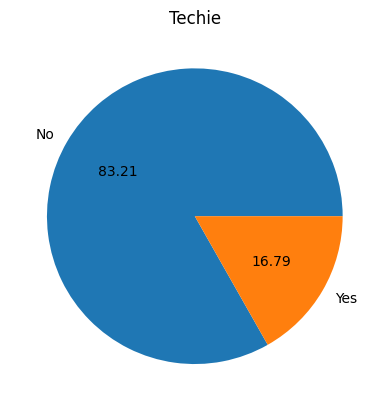

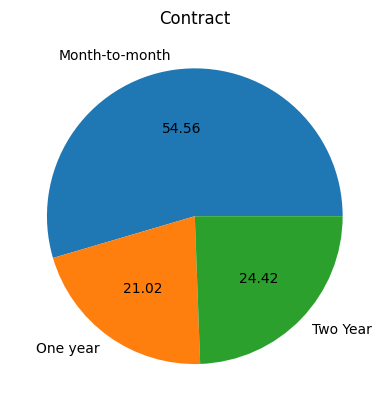

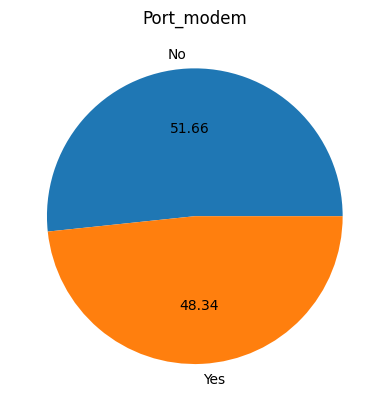

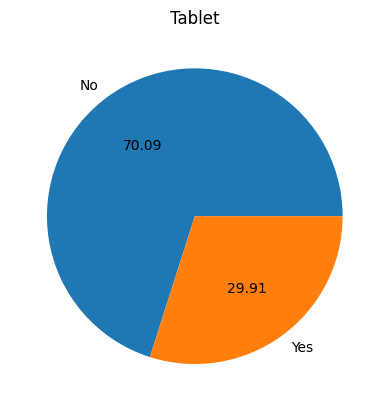

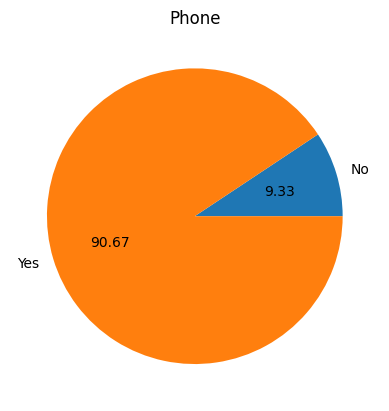

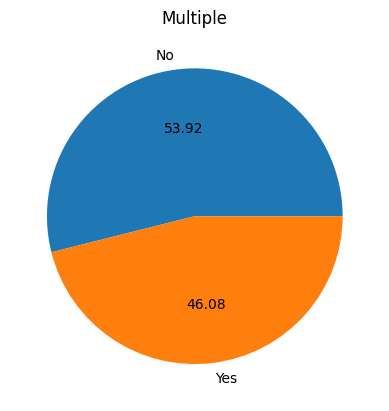

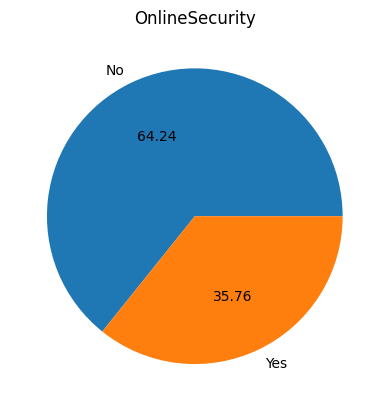

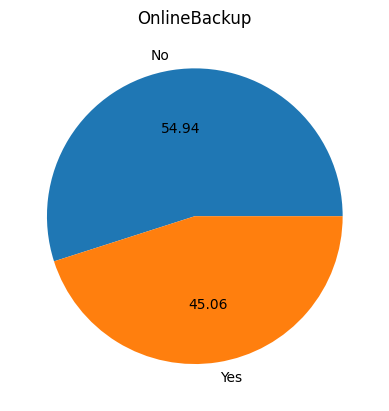

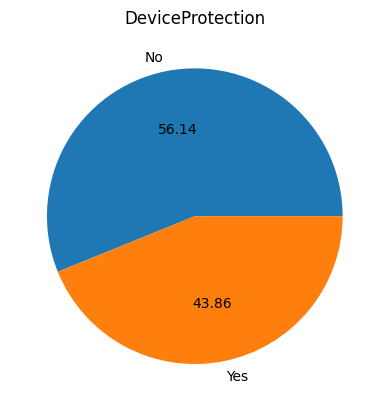

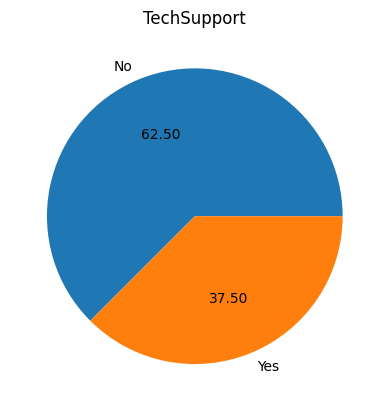

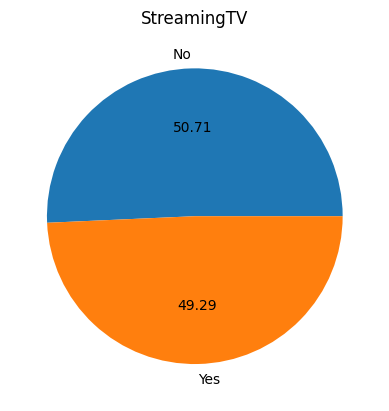

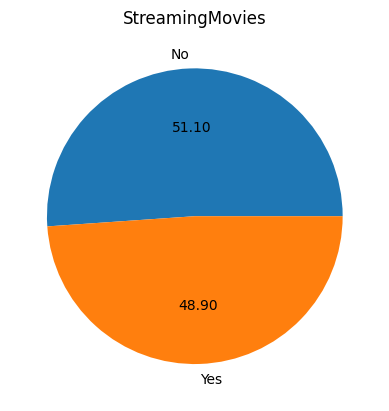

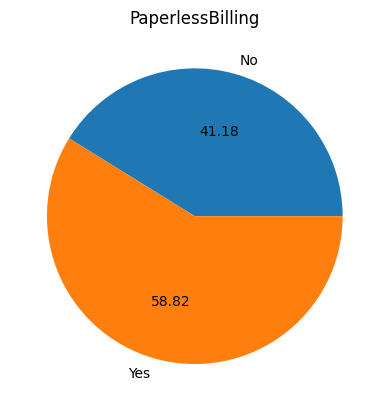

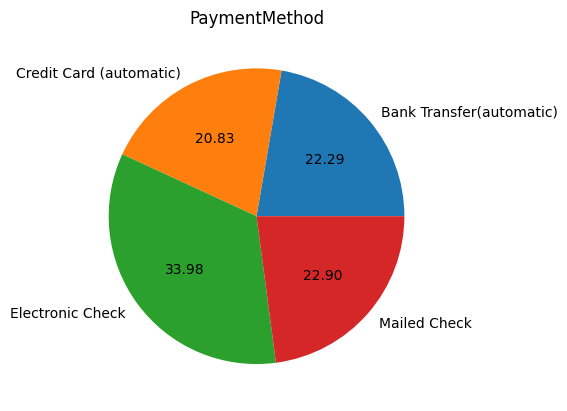

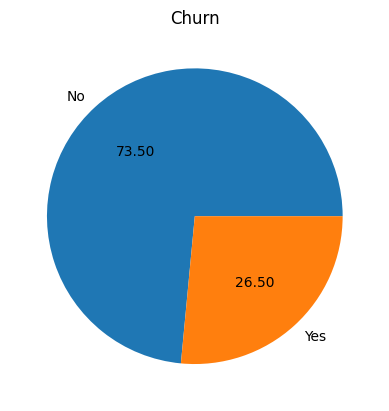

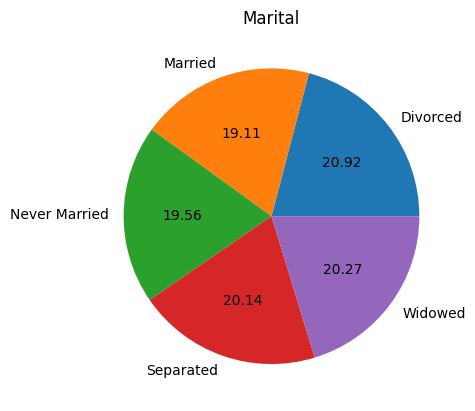

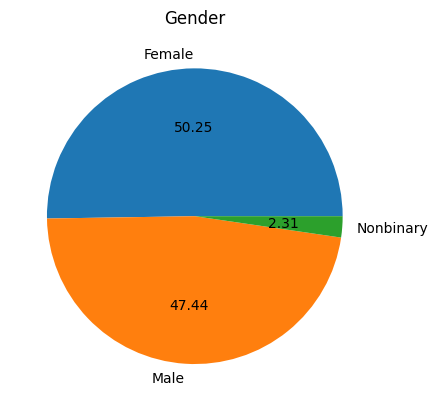

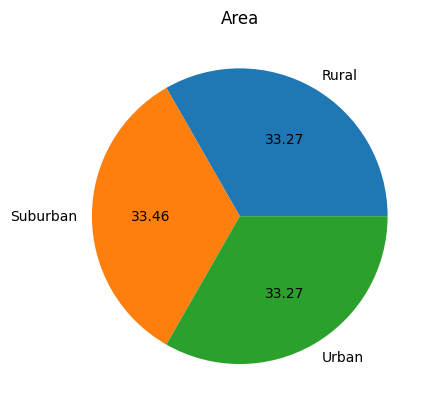

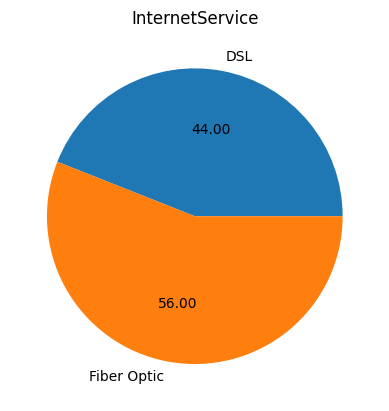

In [10]:

for value in categoricals:
    cat_data.groupby(value).size().plot(kind='pie', autopct='%.2f', title=f'{value}')
    plt.show()


# Clean Data and Fit Models

In [11]:

# Transform yes and no values to 1 column of 1 or 0 respectively
for column in yes_no_columns:
    df[column] = df[column].apply(Helpers.transform_yes_no_to_bit)

# One hot encode the remaining columns
for column in categorical_columns:
    df = Helpers.one_hot_encode(df=df, column=column)

# Drop columns that cannot be transformed to numeric values
for column in columns_to_drop:
    features.remove(column)
df = df.drop(columns=columns_to_drop, axis=1)

# Repopulate feature list with 1 Hot column names
features = list(df.columns)

# Convert all data types to numeric
for feature in features:
    df[feature] = pd.to_numeric(df[feature], errors="coerce")

# Drop columns that have values that won't convert
df = df.dropna(axis=1)

# Remove the target value from the possible feature lise
features.remove(target_for_analysis)

# Repopulate feature list after columns have been dropped
features = list(df.columns)
df.replace({False: 0, True: 1}, inplace=True)
# Create Exog and Endog data frames
X = df[features]
y = df[target_for_analysis]
df.to_csv('prepared_data.csv', index=False)

C:\Users\isaac\AppData\Local\Temp\ipykernel_25364\1941504365.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


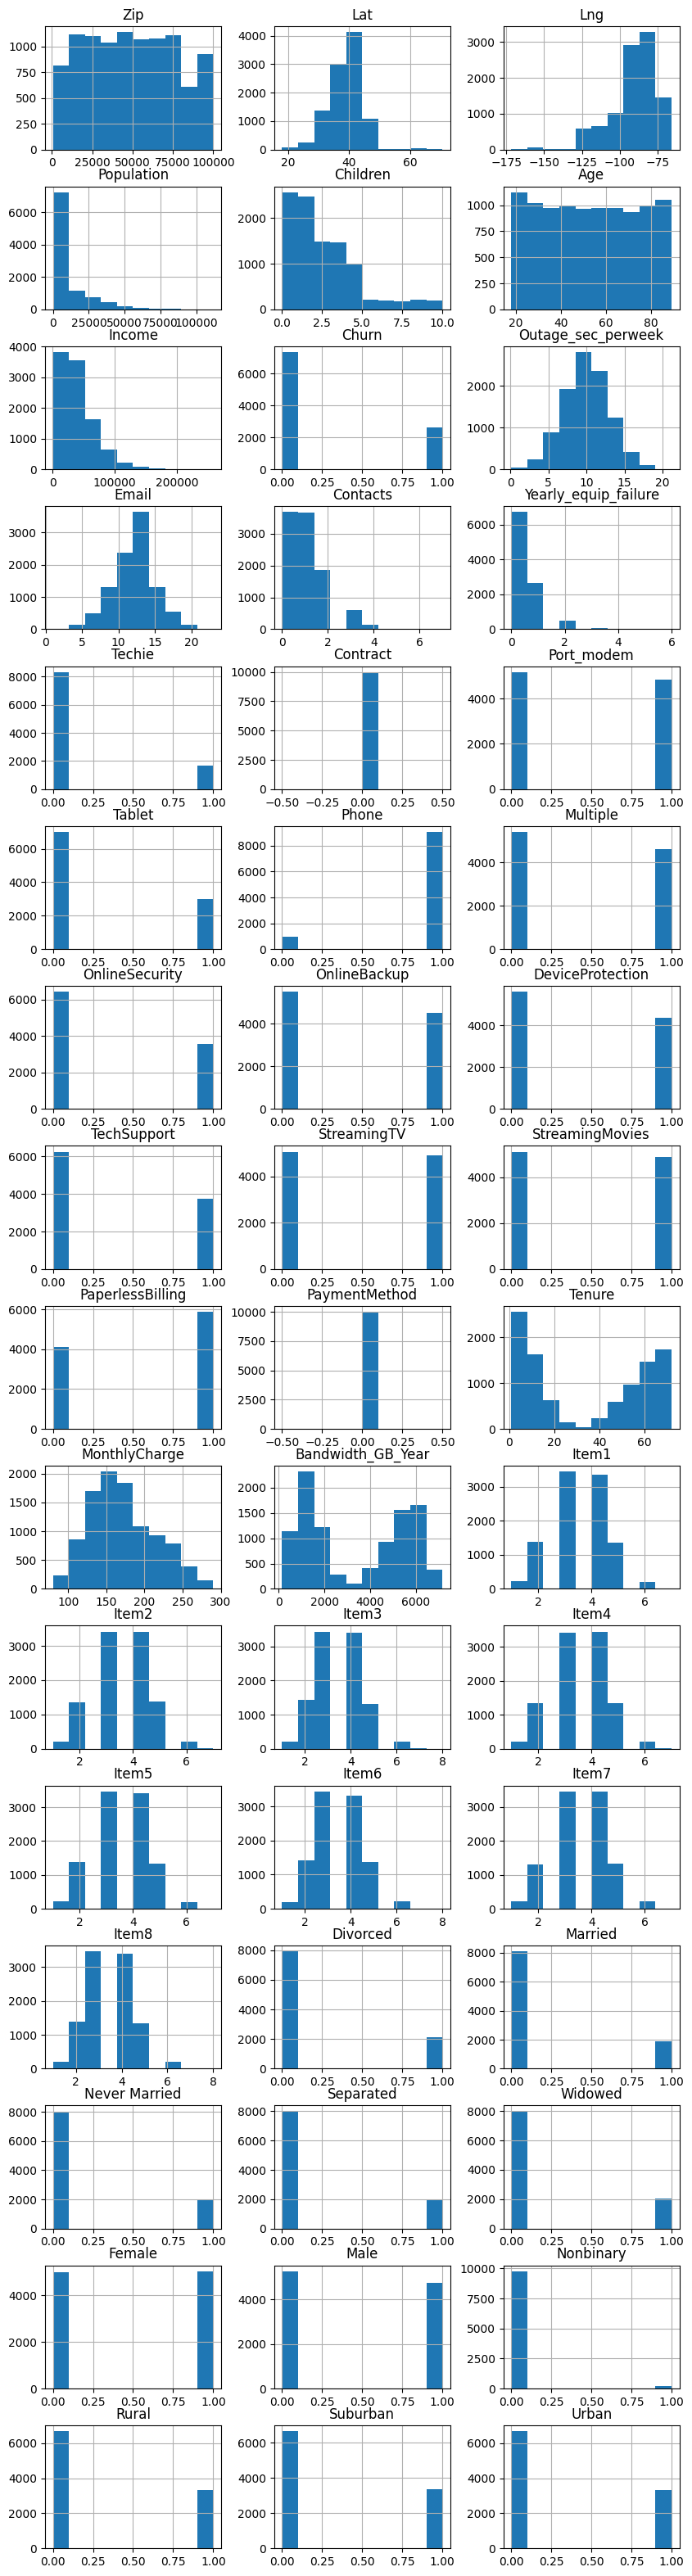

In [12]:
import matplotlib.pyplot as plt
column_count = 3
fig, axis = plt.subplots(len(X.columns) // column_count, column_count, figsize=(10, 40))
i = 0
len_axis = len(axis)
for triaxis in axis:
    for sub_axis in triaxis:
        X.hist(column = X.columns[i], ax=sub_axis)
        i = i+1
plt.show()

In [13]:
print(*columns)

Item5 Item1 Item2 MonthlyCharge Income Yearly_equip_failure Children Item8 Bandwidth_GB_Year Item7 Contacts Item3 Item4 Outage_sec_perweek Age Email Population Item6


In [14]:
import statsmodels.api as sm

endog= df[target_for_analysis]
exog = df[list(columns)]

model = sm.OLS(endog, exog)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.364e+05
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:31:10   Log-Likelihood:                         -24368.
No. Observations:               10000   AIC:                                  4.877e+04
Df Residuals:                    9982   BIC:                                  4.890e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Item5                   -0.0699      0.026     -2.665      0.008      -0.121      -0.018
Item1                    0.1038      0.040      2.616      0.009       0.026       0.182
Item2                   -0.0422      0.037     -1.137      0.256      -0.115       0.031
MonthlyCharge           -0.0401      0.001    -65.952      0.000      -0.041      -0.039
Income               -1.509e-06   9.75e-07     -1.547      0.122   -3.42e-06    4.02e-07
Yearly_equip_failure    -0.0126      0.043     -0.290      0.772      -0.098       0.073
Children                -0.3768      0.013    -29.308      0.000      -0.402      -0.352
Item8                   -0.0867      0.029     -3.002      0.003      -0.143      -0.030
Bandwidth_GB_Year        0.0121   1.26e-05    954.036      0.000       0.012       0.012
Item7                    0.0047      0.030      0.154      0.878      -0.055       0.064
Contacts                -0.0407      0.028     -1.457      0.145      -0.096       0.014
Item3                   -0.0048      0.034     -0.142      0.887      -0.071       0.062
Item4                   -0.0275      0.028     -0.996      0.320      -0.082       0.027
Outage_sec_perweek      -0.0024      0.009     -0.271      0.786      -0.020       0.015
Age                      0.0396      0.001     30.252      0.000       0.037       0.042
Email                   -0.0059      0.009     -0.682      0.495      -0.023       0.011
Population           -1.106e-06   1.92e-06     -0.577      0.564   -4.86e-06    2.65e-06
Item6                   -0.0338      0.032     -1.048      0.295      -0.097       0.029
==============================================================================
Omnibus:                     9403.486   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.533
Skew:                          -0.437   Prob(JB):                    2.87e-201
Kurtosis:                       1.795   Cond. No.                     8.39e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Reduce the features by P-Value

In [15]:
p_values = result.pvalues.copy()
p_values.sort_values(ascending=False, inplace=True)

In [16]:
print(p_values.iloc[0], p_values.keys()[0])

0.8873144280458416 Item3


In [17]:
alpha = 0.05

while (p_values.iloc[0] > alpha):
    endog= df[target_for_analysis]
    exog = df[list(columns)]
    model = sm.OLS(endog, exog)
    result = model.fit()
    p_values = result.pvalues.sort_values(ascending=False)
    columns.remove(p_values.keys()[0])
    
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.069e+05
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:31:25   Log-Likelihood:                         -24373.
No. Observations:               10000   AIC:                                  4.876e+04
Df Residuals:                    9992   BIC:                                  4.882e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Item5                -0.0874      0.024     -3.679      0.000      -0.134      -0.041
Item1                 0.0547      0.027      2.025      0.043       0.002       0.108
MonthlyCharge        -0.0404      0.001    -68.966      0.000      -0.042      -0.039
Children             -0.3787      0.013    -29.545      0.000      -0.404      -0.354
Item8                -0.1047      0.028     -3.800      0.000      -0.159      -0.051
Bandwidth_GB_Year     0.0121   1.26e-05    957.275      0.000       0.012       0.012
Item4                -0.0508      0.025     -2.030      0.042      -0.100      -0.002
Age                   0.0390      0.001     30.284      0.000       0.037       0.042
==============================================================================
Omnibus:                     9724.908   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.403
Skew:                          -0.437   Prob(JB):                    6.82e-202
Kurtosis:                       1.791   Cond. No.                     4.79e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Reduce Multicollinearity

In [18]:
sorted_optomized_features = result.pvalues.sort_values(ascending=False).copy()
sorted_optomized_features.head()

Item1        4.288940e-02
Item4        4.234443e-02
Item5        2.357495e-04
Item8        1.456509e-04
Children    5.348629e-184
dtype: float64

In [19]:
import statsmodels.api as sm

while result.condition_number > 30:
    some_mc_endog= df[target_for_analysis]
    some_mc_exog = df[list(columns)]
    model = sm.OLS(some_mc_endog, some_mc_exog)
    result = model.fit()
    # remove the feature with the least statistical significance
    temp_p_values = result.pvalues.sort_values(ascending=False).copy()
    columns.remove(temp_p_values.keys()[0])
    

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          8.115e+05
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:33:08   Log-Likelihood:                         -29871.
No. Observations:               10000   AIC:                                  5.974e+04
Df Residuals:                    9999   BIC:                                  5.975e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Bandwidth_GB_Year     0.0107   1.19e-05    900.845      0.000       0.011       0.011
==============================================================================
Omnibus:                      334.471   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.962
Skew:                          -0.054   Prob(JB):                     8.24e-35
Kurtosis:                       2.396   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

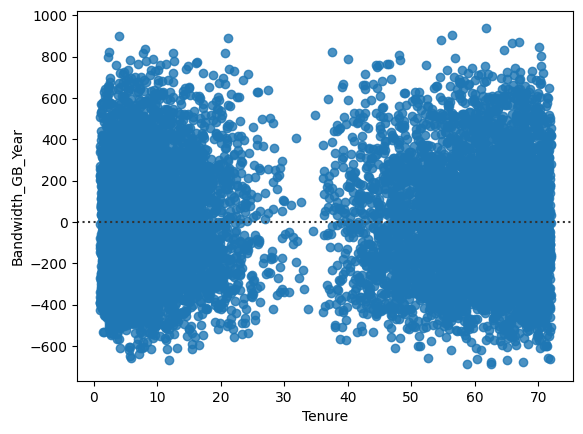

In [20]:
sns.residplot(data=df, x=target_for_analysis, y='Bandwidth_GB_Year')
plt.show()

In [21]:
print(result.mse_resid)
print(np.sqrt(result.mse_resid))

23.021015806162364
4.798022072287951


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          8.115e+05
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:33:40   Log-Likelihood:                         -29871.
No. Observations:               10000   AIC:                                  5.974e+04
Df Residuals:                    9999   BIC:                                  5.975e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Bandwidth_GB_Year     0.0107   1.19e-05    900.845      0.000       0.011       0.011
==============================================================================
Omnibus:                      334.471   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.962
Skew:                          -0.054   Prob(JB):                     8.24e-35
Kurtosis:                       2.396   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
import statsmodels.formula.api as sm
import numpy as np

# Create a simple linear regression model
model = sm.ols(f'{target_for_analysis} ~ Bandwidth_GB_Year', data=df).fit()

# Print the regression equation
print(model.params)

Intercept           -6.173576
Bandwidth_GB_Year    0.011998
dtype: float64


In [24]:
df['Bandwidth_GB_Year'].head(100)

0      904.536110
1      800.982766
2     2054.706961
3     2164.579412
4      271.493436
         ...     
95    1158.913690
96     529.407330
97    1956.733700
98    2056.386979
99    1067.373076
Name: Bandwidth_GB_Year, Length: 100, dtype: float64

In [25]:
df['predicted_tenure'] =  model.predict(df['Bandwidth_GB_Year'])

In [26]:
df[[target_for_analysis, 'predicted_tenure', 'Bandwidth_GB_Year']].head(10)

,Tenure,predicted_tenure,Bandwidth_GB_Year
0,6.795513,4.678635,904.536110
1,1.156681,3.436249,800.982766
2,15.754144,18.477859,2054.706961
3,17.087227,19.796059,2164.579412
4,1.670972,-2.916322,271.493436
5,7.000994,6.296166,1039.357983
6,13.236774,16.708654,1907.242972
7,4.264255,5.579370,979.612708
8,8.220686,9.577698,1312.874964
9,3.422086,-0.069661,508.763791
